In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("../input/BTC-USD.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-26,6754.640137,6774.750000,6620.750000,6707.259766,6707.259766,3295500000
1,2018-08-27,6710.799805,6884.640137,6689.709961,6884.640137,6884.640137,4019000000
2,2018-08-28,6891.080078,7109.560059,6882.339844,7096.279785,7096.279785,4659940000
3,2018-08-29,7091.709961,7113.299805,6970.819824,7047.160156,7047.160156,4145880000
4,2018-08-30,7043.759766,7072.689941,6834.689941,6978.229980,6978.229980,4463250000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1827 non-null   object 
 1   Open       1827 non-null   float64
 2   High       1827 non-null   float64
 3   Low        1827 non-null   float64
 4   Close      1827 non-null   float64
 5   Adj Close  1827 non-null   float64
 6   Volume     1827 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 100.0+ KB


In [4]:
length_data = len(data)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 1827
Train data length : 1279
Validation data lenth : 548


In [5]:
train_data = data[:length_train].iloc[:,:2] 
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,Open
0,2018-08-26,6754.640137
1,2018-08-27,6710.799805
2,2018-08-28,6891.080078
3,2018-08-29,7091.709961
4,2018-08-30,7043.759766
...,...,...
1274,2022-02-20,40118.101563
1275,2022-02-21,38423.210938
1276,2022-02-22,37068.769531
1277,2022-02-23,38285.281250


In [6]:
validation_data = data[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,Open
1279,2022-02-25,38333.746094
1280,2022-02-26,39213.082031
1281,2022-02-27,39098.699219
1282,2022-02-28,37706.000000
1283,2022-03-01,43194.503906
...,...,...
1822,2023-08-22,26130.748047
1823,2023-08-23,26040.474609
1824,2023-08-24,26431.519531
1825,2023-08-25,26163.679688


In [7]:
dataset_train = train_data.Open.values
dataset_train.shape

(1279,)

In [8]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(1279, 1)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(1279, 1)

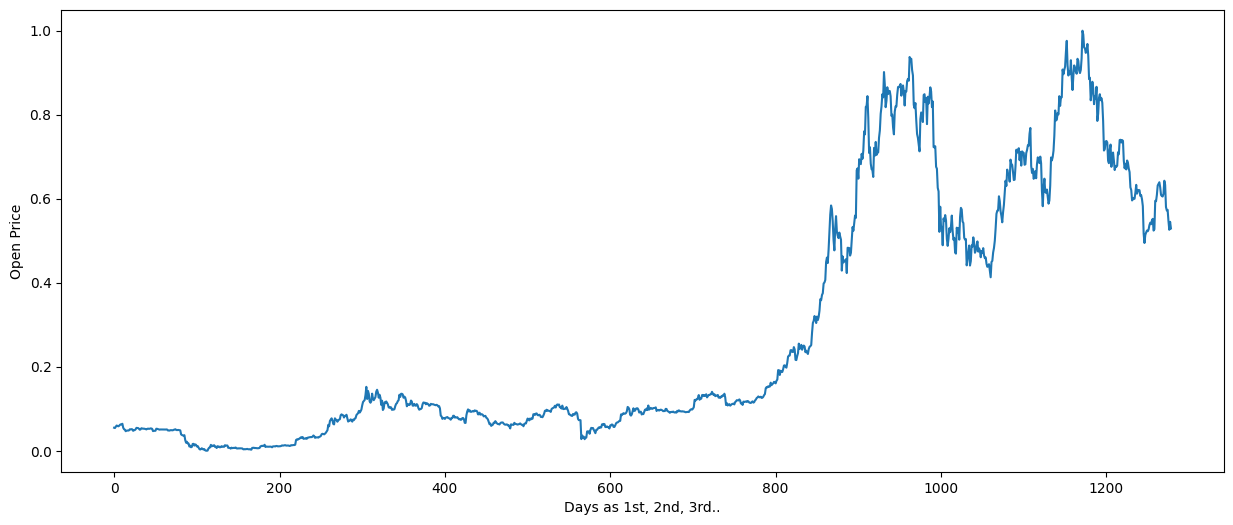

In [10]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [11]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (1229, 50)
Shape of y_train before reshape : (1229,)


In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (1229, 50, 1)
Shape of y_train after reshape : (1229, 1)


In [14]:
X_train[0]

array([[0.05470652],
       [0.05402485],
       [0.056828  ],
       [0.05994756],
       [0.05920199],
       [0.05811685],
       [0.05921833],
       [0.06146933],
       [0.06286017],
       [0.06261093],
       [0.06414187],
       [0.05471429],
       [0.05119683],
       [0.05012785],
       [0.04644604],
       [0.0476618 ],
       [0.04813309],
       [0.04790187],
       [0.04848076],
       [0.05098677],
       [0.05089332],
       [0.05131749],
       [0.05096578],
       [0.04734056],
       [0.04875458],
       [0.04917439],
       [0.05096282],
       [0.05440191],
       [0.05409513],
       [0.0539311 ],
       [0.05235864],
       [0.0500131 ],
       [0.05067392],
       [0.05352651],
       [0.0529722 ],
       [0.05237528],
       [0.05261069],
       [0.05219694],
       [0.05158462],
       [0.05071466],
       [0.0519001 ],
       [0.05265112],
       [0.05215713],
       [0.052305  ],
       [0.05312738],
       [0.05292851],
       [0.05209587],
       [0.046

In [15]:
y_train[0]

array([0.04752295])

In [16]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
39/39 [==============================] - 11s 64ms/step - loss: 0.3481 - accuracy: 0.0016
Epoch 2/50
39/39 [==============================] - 2s 61ms/step - loss: 0.1848 - accuracy: 0.0016
Epoch 3/50
39/39 [==============================] - 2s 63ms/step - loss: 0.1161 - accuracy: 0.0016
Epoch 4/50
39/39 [==============================] - 3s 67ms/step - loss: 0.0881 - accuracy: 8.1367e-04
Epoch 5/50
39/39 [==============================] - 2s 63ms/step - loss: 0.0620 - accuracy: 0.0016
Epoch 6/50
39/39 [==============================] - 3s 68ms/step - loss: 0.0513 - accuracy: 0.0016
Epoch 7/50
39/39 [==============================] - 3s 68ms/step - loss: 0.0404 - accuracy: 0.0016
Epoch 8/50
39/39 [==============================] - 2s 62ms/step - loss: 0.0345 - accuracy: 0.0016
Epoch 9/50
39/39 [==============================] - 3s 66ms/step - loss: 0.0294 - accuracy: 0.0016
Epoch 10/50
39/39 [==============================] - 3s 65ms/step - loss: 0.0259 - accuracy: 0.0016
Epoc

In [17]:
# Losses
history.history["loss"]

[0.3480786979198456,
 0.18482275307178497,
 0.11611069738864899,
 0.08813996613025665,
 0.062037449330091476,
 0.05127866938710213,
 0.04037901386618614,
 0.03454495593905449,
 0.029366809874773026,
 0.025925152003765106,
 0.022094732150435448,
 0.016575636342167854,
 0.015805544331669807,
 0.01714656688272953,
 0.015405228361487389,
 0.014852460473775864,
 0.010816628113389015,
 0.012172413989901543,
 0.010702135041356087,
 0.01003230269998312,
 0.009337171912193298,
 0.008446895517408848,
 0.00824581366032362,
 0.009274841286242008,
 0.008089040406048298,
 0.0071524446830153465,
 0.0065482002682983875,
 0.0065842666663229465,
 0.006120938807725906,
 0.005648354534059763,
 0.005137368571013212,
 0.005578149110078812,
 0.005471628624945879,
 0.00516895204782486,
 0.005278404802083969,
 0.004899957217276096,
 0.00495832460001111,
 0.0048510413616895676,
 0.00370480353012681,
 0.004547087475657463,
 0.0044830357655882835,
 0.0041454387828707695,
 0.004170559346675873,
 0.0034435538109391

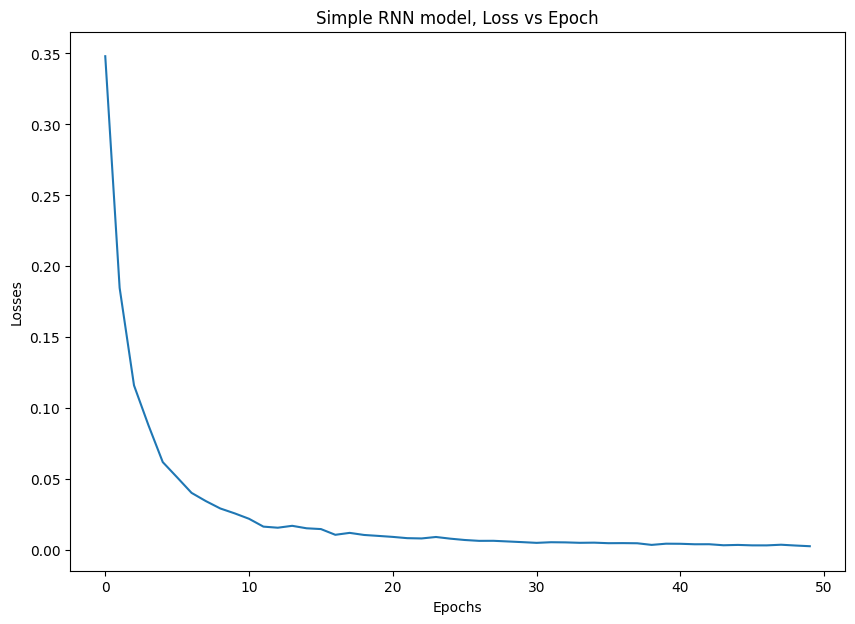

In [18]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

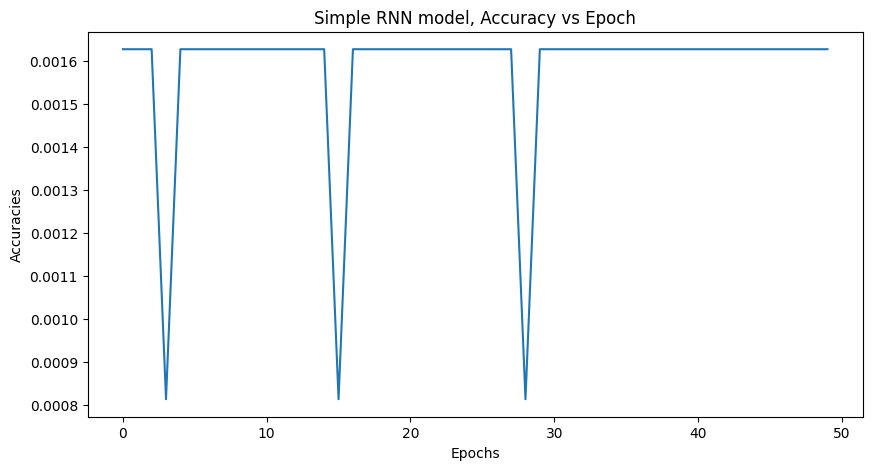

In [19]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

In [20]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

39/39 [==============================] - 2s 17ms/step


(1229, 1)

In [21]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(1229, 1)

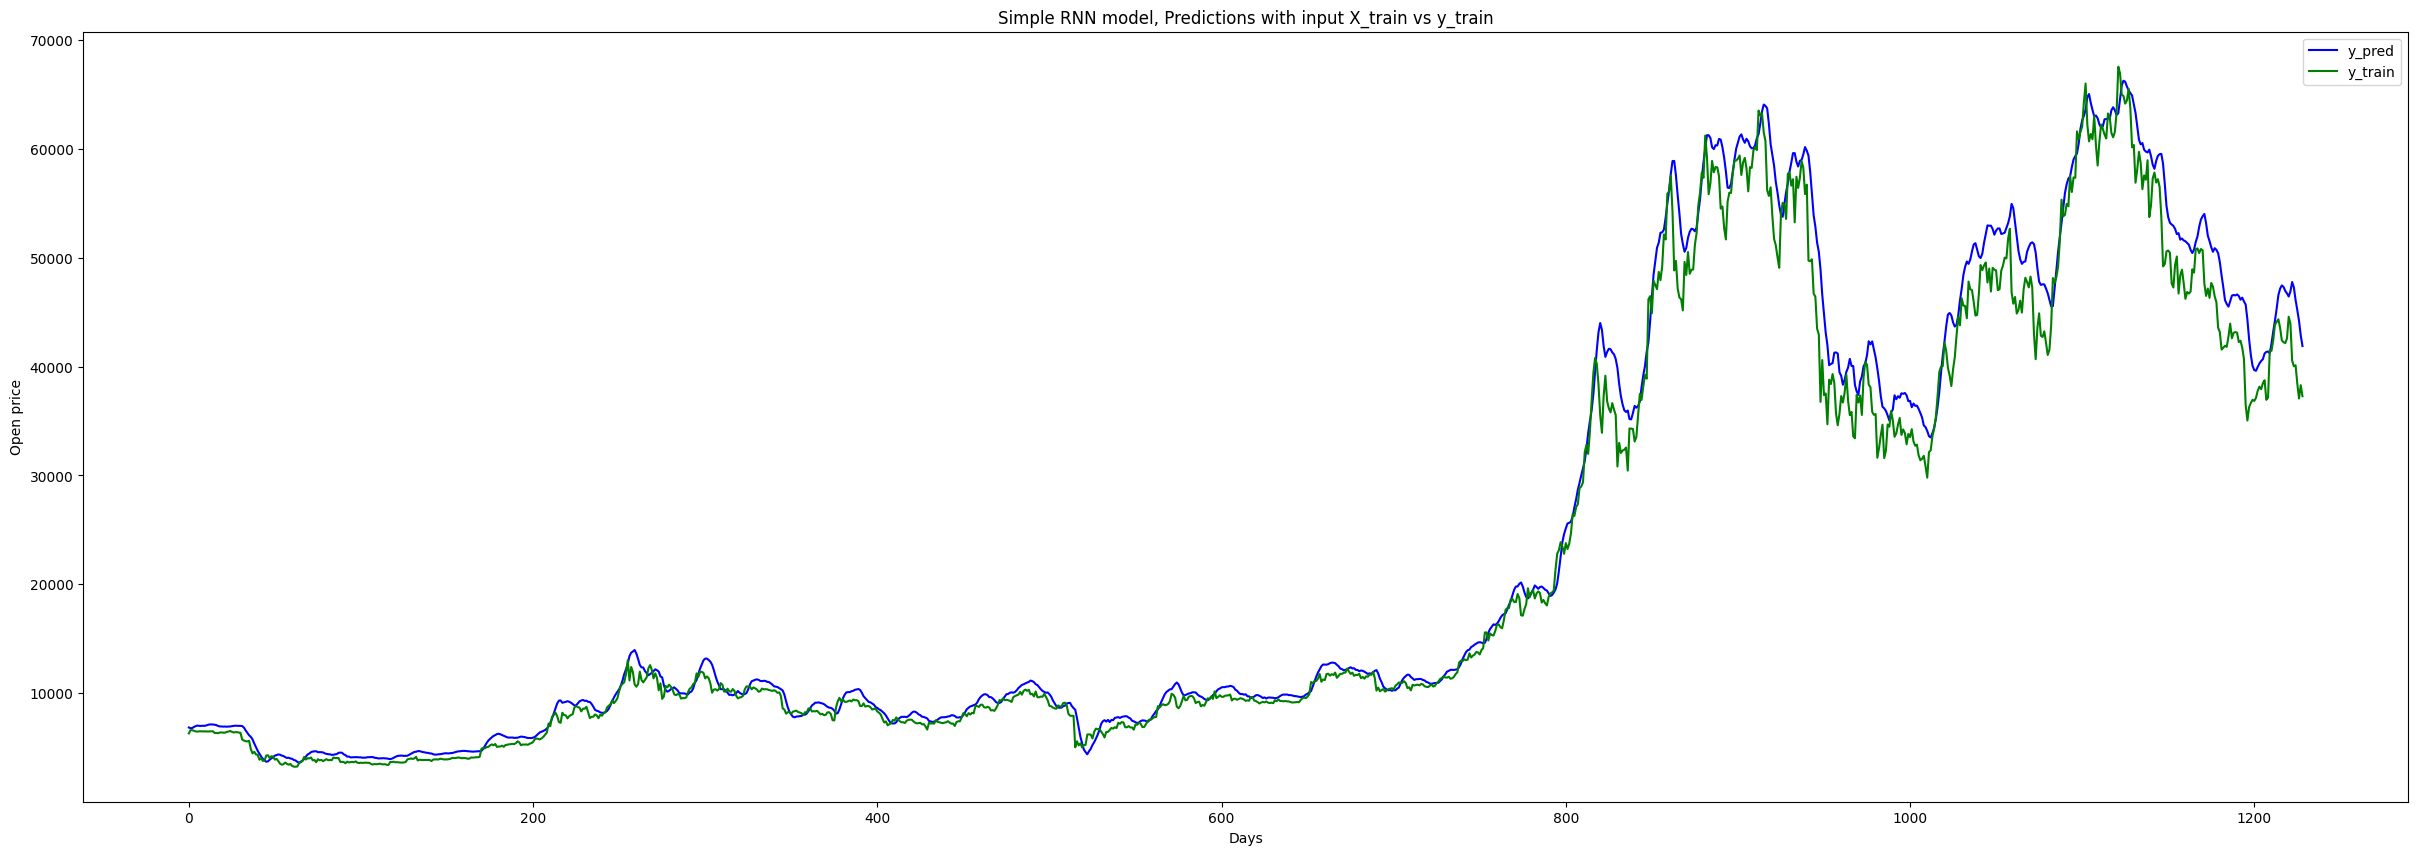

In [22]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [23]:
dataset_validation = validation_data.Open.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (548, 1)


In [24]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [25]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [26]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (498, 50)
Shape of y_test before reshape : (498,)


In [27]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [28]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (498, 50, 1)
Shape of y_test after reshape : (498, 1)


In [29]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

16/16 [==============================] - 0s 17ms/step
Shape of y_pred_of_test : (498, 1)


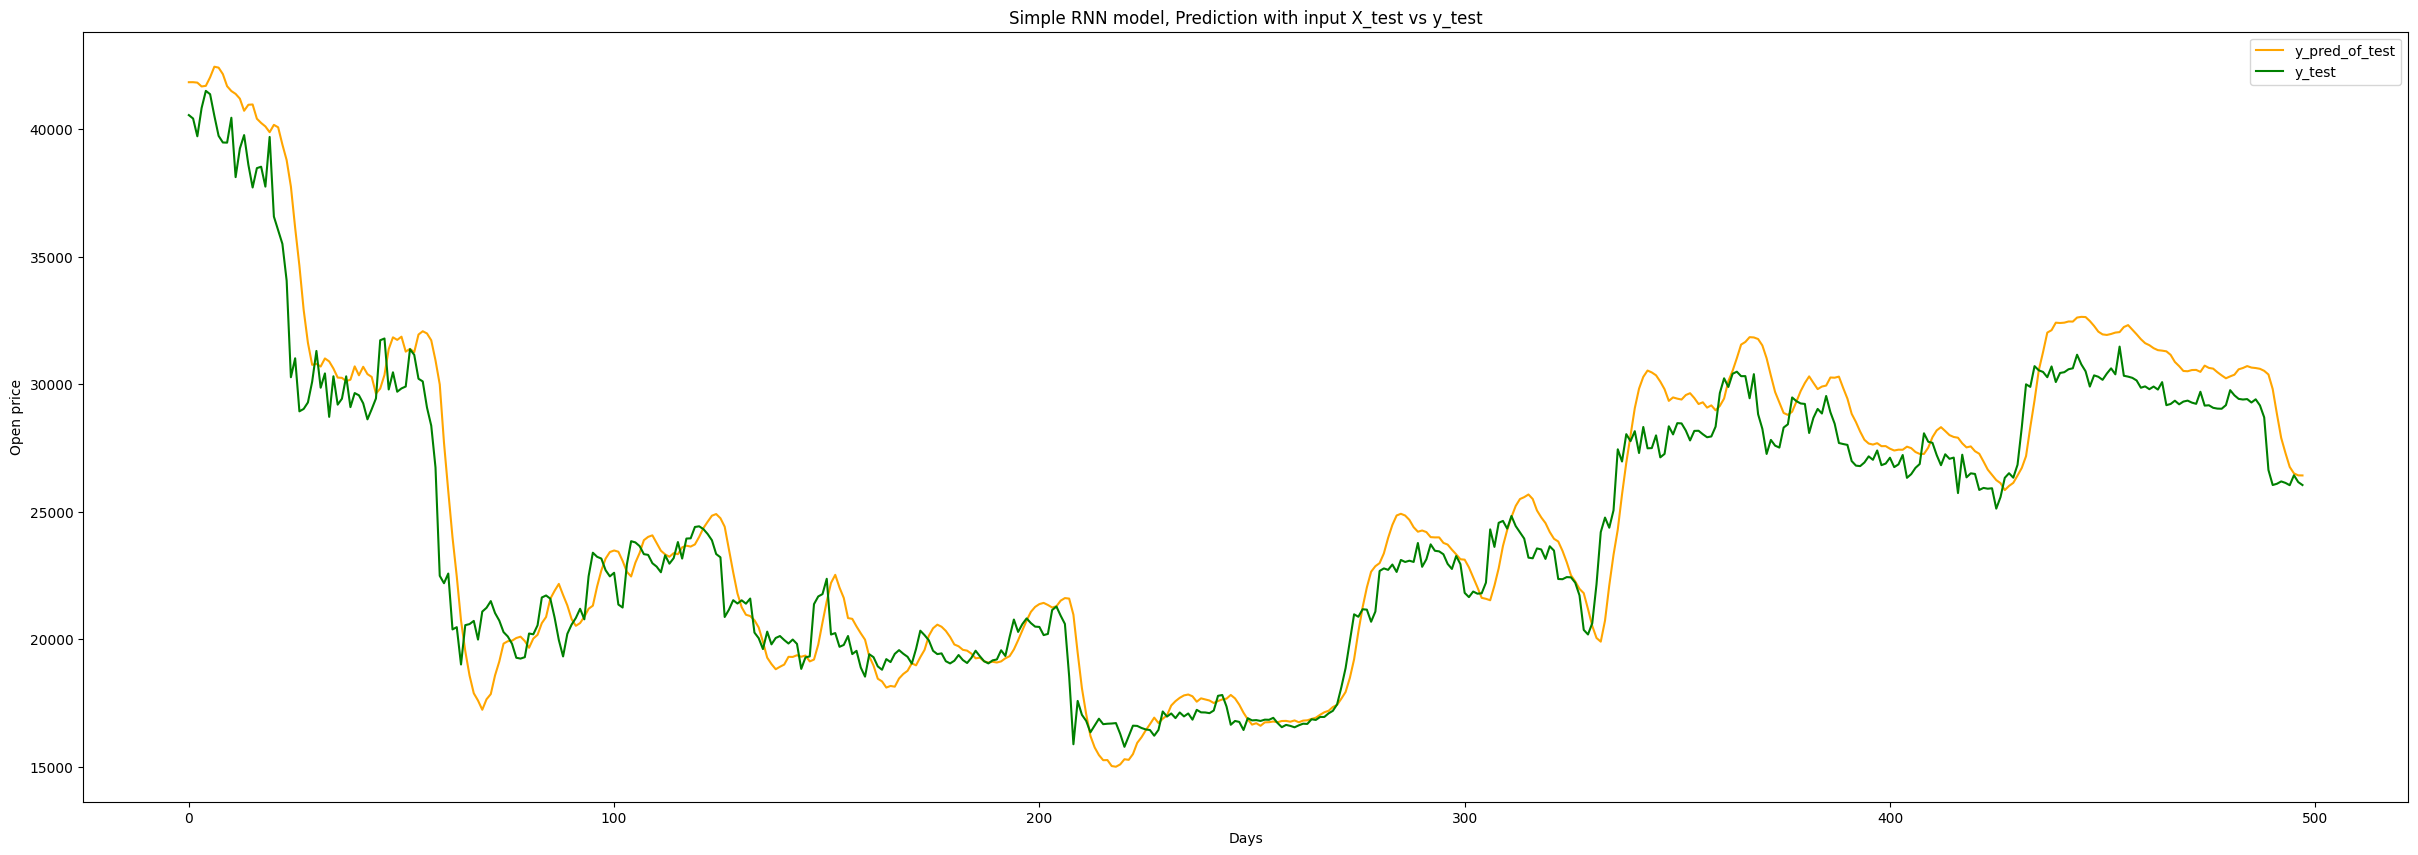

In [30]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

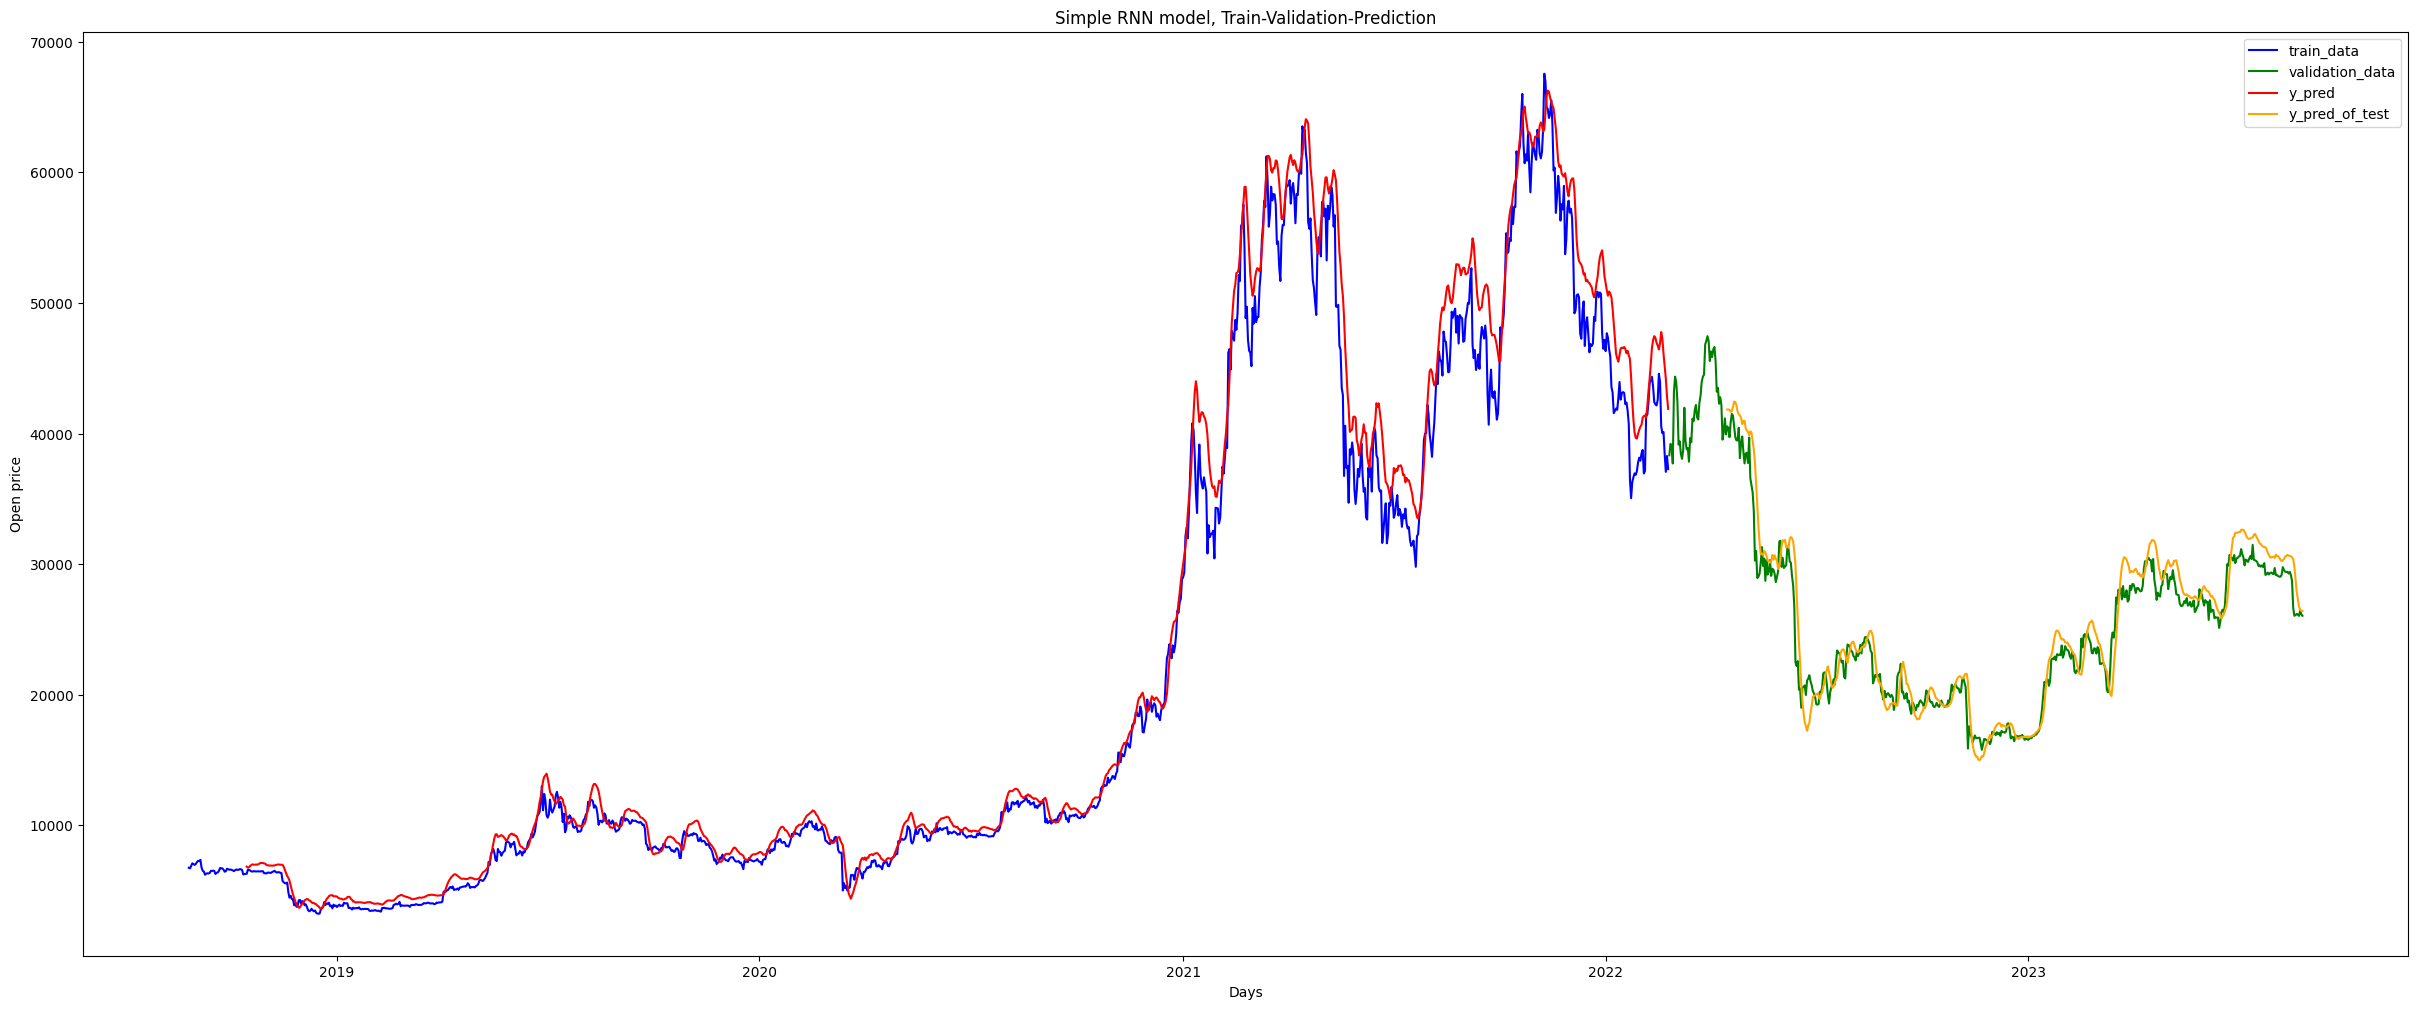

In [31]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

In [33]:
regressor.save("RNN_model.h5")